In [26]:
import numpy as np
from scipy.optimize import minimize
from scipy.io import loadmat
from numpy.linalg import det, inv
from math import sqrt, pi
import scipy.io
import matplotlib.pyplot as plt
import pickle
import sys

In [70]:
def ldaLearn(X,y):
    # Inputs
    # X - a N x d matrix with each row corresponding to a training example
    # y - a N x 1 column vector indicating the labels for each training example
    #
    # Outputs
    # means - A d x k matrix containing learnt means for each of the k classes
    # covmat - A single d x d learnt covariance matrix 
    Xp=np.concatenate((y, X), axis=1)
    means = np.zeros(shape=(Xp.shape[1], np.unique(y).size))
    covmat = np.zeros(shape=(X.shape[1], X.shape[1]))
    for i in range(np.unique(y).size):
        means[:,i]=Xp[Xp[:,0] == np.unique(y)[i],:].mean(0)
    covmat=np.cov(X.T)*np.identity(X.shape[1])
    # IMPLEMENT THIS METHOD 
    return means,covmat

In [71]:
def qdaLearn(X,y):
    # Inputs
    # X - a N x d matrix with each row corresponding to a training example
    # y - a N x 1 column vector indicating the labels for each training example
    #
    # Outputs
    # means - A d x k matrix containing learnt means for each of the k classes
    # covmats - A list of k d x d learnt covariance matrices for each of the k classes
    # IMPLEMENT THIS METHOD
    Xp=np.concatenate((y, X), axis=1)
    means = np.zeros(shape=(Xp.shape[1], np.unique(y).size))
    covmats = np.zeros(shape=(np.unique(y).size,X.shape[1], X.shape[1]))
    for i in range(np.unique(y).size):
        means[:,i]=Xp[Xp[:,0] == np.unique(y)[i],:].mean(0)
        covmats[i]=np.cov(Xp[Xp[:,0] == np.unique(y)[i],1:].T)
    return means,covmats

def qdaLearn(X,y):
    # Inputs
    # X - a N x d matrix with each row corresponding to a training example
    # y - a N x 1 column vector indicating the labels for each training example
    #
    # Outputs
    # means - A d x k matrix containing learnt means for each of the k classes
    # covmats - A list of k d x d learnt covariance matrices for each of the k classes
    # IMPLEMENT THIS METHOD
    Xp=np.concatenate((y, X), axis=1)
    means = np.zeros(shape=(Xp.shape[1], np.unique(y).size))
    covmats = np.zeros(shape=(np.unique(y).size,X.shape[1], X.shape[1]))
    for i in range(np.unique(y).size):
        means[:,i]=Xp[Xp[:,0] == np.unique(y)[i],:].mean(0)
        covmats[i]=np.cov(Xp[Xp[:,0] == np.unique(y)[i],1:].T)*np.identity(X.shape[1])
    return means,covmats
    
    #This QDA Learning function has its covmats explicitly set to diagonal matrices and completely ignoring the off diagonal terms. If this is used, the accuracy of QDA Test gets to 97%.

In [57]:
def ldaTest(means,covmat,Xtest,ytest):
    # Inputs
    # means, covmat - parameters of the LDA model
    # Xtest - a N x d matrix with each row corresponding to a test example
    # ytest - a N x 1 column vector indicating the labels for each test example
    # Outputs
    # acc - A scalar accuracy value
    # ypred - N x 1 column vector indicating the predicted labels
    ypred = np.zeros(shape=(ytest.shape[0],1))
    for i in range(Xtest[:,0].size):
        newmat = np.dot(np.dot((np.tile(Xtest[i],(means[1:,].shape[1],1)).T-means[1:,]).T,inv(covmat)),
                        (np.tile(Xtest[i],(means[1:,].shape[1],1)).T-means[1:,]))
        ypred[i] = means[0,newmat.diagonal().argmin()]
    acc = np.sum(ypred == ytest)/ytest.shape[0]
    # IMPLEMENT THIS METHOD
    return acc,ypred

In [58]:
def qdaTest(means,covmats,Xtest,ytest):
    # Inputs
    # means, covmats - parameters of the QDA model
    # Xtest - a N x d matrix with each row corresponding to a test example
    # ytest - a N x 1 column vector indicating the labels for each test example
    # Outputs
    # acc - A scalar accuracy value
    # ypred - N x 1 column vector indicating the predicted labels
    newmat = np.zeros(shape=(means.shape[1]))
    ypred = np.zeros(shape=(ytest.shape[0],1))
    for i in range(Xtest[:,0].size):
        for j in range(covmats.shape[0]):
            newmat[j] = ((det(2 * np.pi * covmats[j]))**(-1/2)) * np.exp((-1/2)*np.dot(np.dot(((Xtest[i]).T-means[1:,j]).T,inv(covmats[j])),(Xtest[i].T-means[1:,j])))
        ypred[i] = means[0,newmat.argmax()]
    acc = np.sum(ypred == ytest)/ytest.shape[0]
    # IMPLEMENT THIS METHOD
    return acc,ypred

In [59]:
def learnOLERegression(X,y):
    # Inputs:                                                         
    # X = N x d 
    # y = N x 1                                                               
    # Output: 
    # w = d x 1 
    w = np.zeros(shape=(X.shape[1], 1))    
    w = np.dot(inv(np.dot(X.T,X)),np.dot(X.T,y))
    # IMPLEMENT THIS METHOD                                                   
    return w

In [60]:
def learnRidgeRegression(X,y,lambd):
    # Inputs:
    # X = N x d                                                               
    # y = N x 1 
    # lambd = ridge parameter (scalar)
    # Output:                                                                  
    # w = d x 1                                  
    wb = np.zeros(shape=(X.shape[1], 1))    
    wb = np.dot(inv(np.dot(lambd,np.identity(X.shape[1])) + np.dot(X.T,X)),np.dot(X.T,y))    
    # IMPLEMENT THIS METHOD                                                   
    return wb

In [61]:
def testOLERegression(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = X x 1
    # Output:
    # mse
    mse = (1/ytest.shape[0])*((ytest-np.dot(w.T,Xtest.T).T)**2).sum()
    # IMPLEMENT THIS METHOD
    return mse

In [62]:
def regressionObjVal(w, X, y, lambd):

    # compute squared error (scalar) and gradient of squared error with respect
    # to w (vector) for the given data X and y and the regularization parameter
    # lambda                                    

    # IMPLEMENT THIS METHOD

    w = np.array(w).reshape(w.size, 1)
    error = 0.5 * np.dot((np.subtract(y, np.dot(X, w)).T), np.subtract(y, np.dot(X, w))) + 0.5 * lambd * np.dot(w.T, w)
    error_grad = np.add(np.subtract(np.dot(np.dot(X.T, X), w), np.dot(X.T, y)), lambd * w)
    
    return error, error_grad.flatten()

In [63]:
def mapNonLinear(x,p):
    # Inputs:                                                                  
    # x - a single column vector (N x 1)                                       
    # p - integer (>= 0)                                                       
    # Outputs:                                                                 
    # Xd - (N x (p+1)) 
    p=p+1
    Xd = np.zeros(shape=(x.shape[0],p))
    for i in range(p):
        Xd[:,i] = x**i
    # IMPLEMENT THIS METHOD
    return Xd

# Main script


In [68]:
#Problem 1
if sys.version_info.major == 2:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'),encoding = 'latin1')

LDA Accuracy = 0.97
QDA Accuracy = 0.97


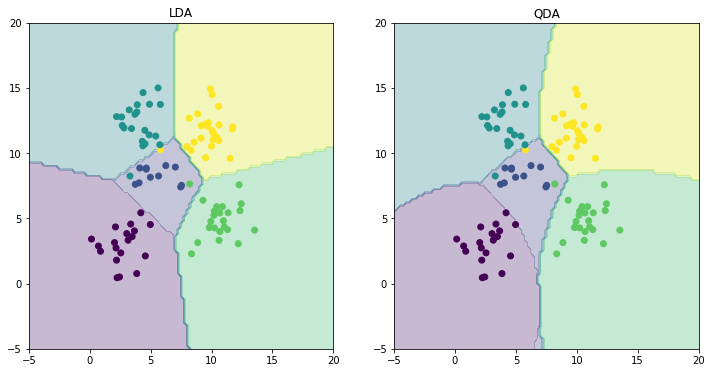

In [69]:
# LDA
means,covmat = ldaLearn(X,y)
ldaacc,ldares = ldaTest(means,covmat,Xtest,ytest)
print('LDA Accuracy = '+str(ldaacc))
# QDA

means,covmats = qdaLearn(X,y)
qdaacc,qdares = qdaTest(means,covmats,Xtest,ytest)
print('QDA Accuracy = '+str(qdaacc))

# plotting boundaries
x1 = np.linspace(-5,20,100)
x2 = np.linspace(-5,20,100)
xx1,xx2 = np.meshgrid(x1,x2)
xx = np.zeros((x1.shape[0]*x2.shape[0],2))
xx[:,0] = xx1.ravel()
xx[:,1] = xx2.ravel()

fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)

zacc,zldares = ldaTest(means,covmat,xx,np.zeros((xx.shape[0],1)))
plt.contourf(x1,x2,zldares.reshape((x1.shape[0],x2.shape[0])),alpha=0.3)
plt.scatter(Xtest[:,0],Xtest[:,1],c=ytest)
plt.title('LDA')

plt.subplot(1, 2, 2)

zacc,zqdares = qdaTest(means,covmats,xx,np.zeros((xx.shape[0],1)))
plt.contourf(x1,x2,zqdares.reshape((x1.shape[0],x2.shape[0])),alpha=0.3)
plt.scatter(Xtest[:,0],Xtest[:,1],c=ytest)
plt.title('QDA')

plt.show()

In [13]:
# Problem 2
if sys.version_info.major == 2:
    X,y,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding = 'latin1')

In [14]:
# add intercept
X_i = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

w = learnOLERegression(X,y)
mle = testOLERegression(w,Xtest,ytest)

w_i = learnOLERegression(X_i,y)
mle_i = testOLERegression(w_i,Xtest_i,ytest)

print('MSE without intercept '+str(mle))
print('MSE with intercept '+str(mle_i))

MSE without intercept 106775.361424
MSE with intercept 3707.84018038


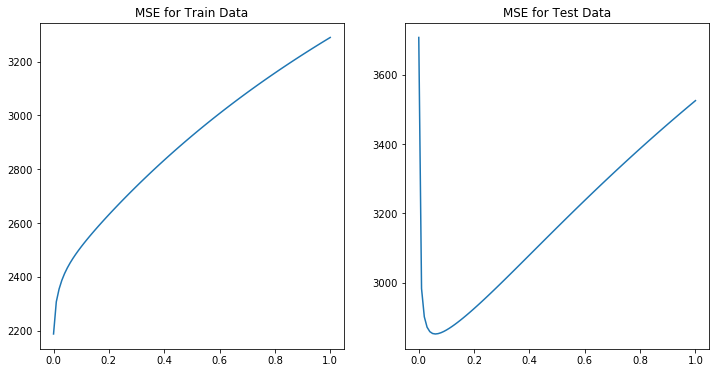

In [15]:
# Problem 3
k = 101
lambdas = np.linspace(0, 1, num=k)
i = 0
mses3_train = np.zeros((k,1))
mses3 = np.zeros((k,1))
for lambd in lambdas:
    w_l = learnRidgeRegression(X_i,y,lambd)
    mses3_train[i] = testOLERegression(w_l,X_i,y)
    mses3[i] = testOLERegression(w_l,Xtest_i,ytest)
    i = i + 1
fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lambdas,mses3_train)
plt.title('MSE for Train Data')
plt.subplot(1, 2, 2)
plt.plot(lambdas,mses3)
plt.title('MSE for Test Data')

plt.show()

In [16]:
testOLERegression(w_l,Xtest_i,ytest)

3525.394552633179

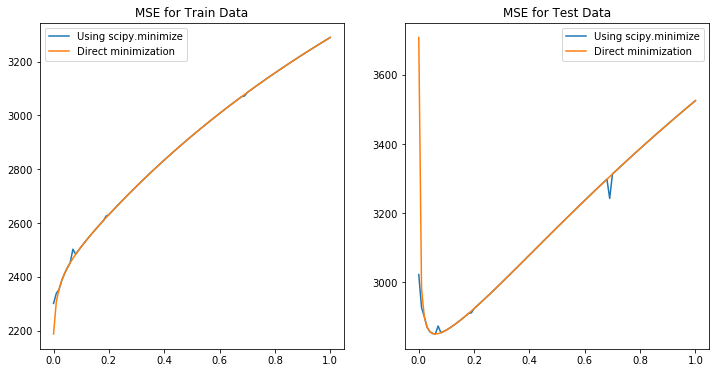

In [20]:
# Problem 4
k = 101
lambdas = np.linspace(0, 1, num=k)
i = 0
mses4_train = np.zeros((k,1))
mses4 = np.zeros((k,1))
opts = {'maxiter' : 70}    # Preferred value.                                                
w_init = np.ones((X_i.shape[1],1))
for lambd in lambdas:
    args = (X_i, y, lambd)
    w_l = minimize(regressionObjVal, w_init, jac=True, args=args,method='CG', options=opts)
    w_l = np.transpose(np.array(w_l.x))
    w_l = np.reshape(w_l,[len(w_l),1])
    mses4_train[i] = testOLERegression(w_l,X_i,y)
    mses4[i] = testOLERegression(w_l,Xtest_i,ytest)
    i = i + 1
fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lambdas,mses4_train)
plt.plot(lambdas,mses3_train)
plt.title('MSE for Train Data')
plt.legend(['Using scipy.minimize','Direct minimization'])

plt.subplot(1, 2, 2)
plt.plot(lambdas,mses4)
plt.plot(lambdas,mses3)
plt.title('MSE for Test Data')
plt.legend(['Using scipy.minimize','Direct minimization'])
plt.show()

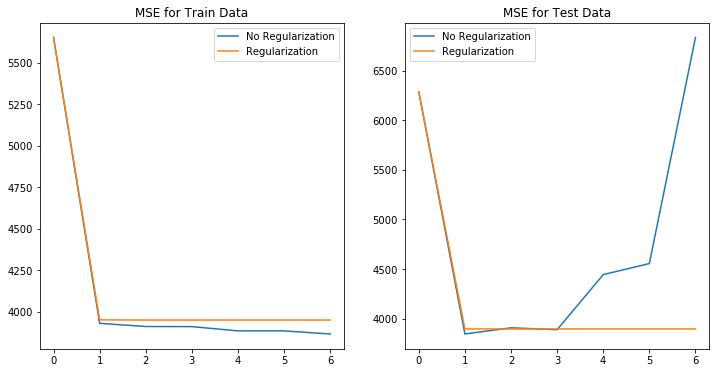

In [18]:
# Problem 5
pmax = 7
lambda_opt = lambdas[mses3.argmin()] # REPLACE THIS WITH lambda_opt estimated from Problem 3
mses5_train = np.zeros((pmax,2))
mses5 = np.zeros((pmax,2))
for p in range(pmax):
    Xd = mapNonLinear(X[:,2],p)
    Xdtest = mapNonLinear(Xtest[:,2],p)
    w_d1 = learnRidgeRegression(Xd,y,0)
    mses5_train[p,0] = testOLERegression(w_d1,Xd,y)
    mses5[p,0] = testOLERegression(w_d1,Xdtest,ytest)
    w_d2 = learnRidgeRegression(Xd,y,lambda_opt)
    mses5_train[p,1] = testOLERegression(w_d2,Xd,y)
    mses5[p,1] = testOLERegression(w_d2,Xdtest,ytest)

fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(range(pmax),mses5_train)
plt.title('MSE for Train Data')
plt.legend(('No Regularization','Regularization'))
plt.subplot(1, 2, 2)
plt.plot(range(pmax),mses5)
plt.title('MSE for Test Data')
plt.legend(('No Regularization','Regularization'))
plt.show()